This is a demo of a new, general purpose p-regionalizer

In [1]:
import pysal as ps
import numpy as np
import descartes as d
import matplotlib.pyplot as plt
%matplotlib inline

First, this module is separated into classes and building tools. The classes form the basic data structure model, which is broadly:

Map (is composed of) Region(s) (are composed of) Atoms

Every global problem has only one map, where all the data are stored. Each region is composed of atoms that point back to the top Map, to avoid data duplication. 

In [2]:
import pr_classes as prc
reload(prc)

<module 'pr_classes' from 'pr_classes.pyc'>

In [3]:
import pr_build as prb
reload(prb)

<module 'pr_build' from 'pr_build.pyc'>

Constraints and objectives are specified with a `name:callable` dictionary. 

This is to allow the application of these generic functions to the data during the solver process (in `pr_build`). For instance, the "floor" component of the first dictionary specifies that each part of the objective `meandiff` needs to be greater than or equal to 450, like an LP written in zero-order form, where constraints are written:

minimize $c^T x$

Subject to: $ Ax - b \leq 0$

$0 \leq x      $

Here, in this case, we specify that our two objectives are that the mean difference is minimized, with the attribute being minimized having a value at least 450 in each region. 

In addition, the constraint dictates that there must be at least 4 atoms in a region. 

Clearly, the floor could be moved to the constraints, but I placed it in the objective dictionary because it affects the way the objective is satisfied.

Here, we see that these k/v pairs are stored in dictionary, either constraints or objectives. I'd love to figure out a way to attach the docstrings and reprs to to these still, and would probably use functools.

In [11]:
ob = prc.Objective()
q.add_objective(np.var, 'total')

An area is initialized by a call to a filepath and an indication of the kind of contiguity used to construct regions. Obviously the contiguity measure can be changed to non-contiguity measures, but right now, that's the way the solver works, since p-regions solvers tend to focus on contiguous regions. 

In [12]:
A = prc.Area(ps.examples.get_path('columbus.shp'), contiguity='rook')

Then, we have to apply the objective to the map, holding the objective to be the same over each region. 

In [15]:
A.set_obj_fn(q)

Finally, we can solve the region. I pass seeds here and say that only 20 iterations should be spent on each inner fitting loop of a tabu search for suitable swaps. I also allow the passing of a custom randomized seed and a verbose option, which prints the moves.

In [17]:
prb.initialize(A,, seeds = [1,5,11,19], MAX_ITERS = 20, verbose=True, rseed = 27)

Iteration: 0 Candidates Remaining: 45


{}

In [70]:
%matplotlib inline

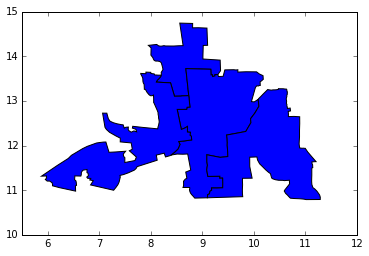

In [71]:
reg_fig = plt.figure()
reg_ax = reg_fig.add_subplot(111) 
for r in A.Regions:
    r.build_polygon()
    reg_ax.add_patch(d.PolygonPatch(r.polygon))

reg_ax.axis([5.5,12,10,15])
reg_fig.show()

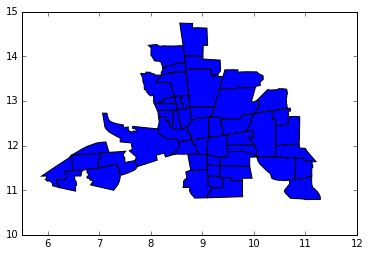

In [72]:
area_fig = plt.figure()
area_ax = area_fig.add_subplot(111)

for a in A.Atoms.values():
    area_ax.add_patch(d.PolygonPatch(a.polygon))

area_ax.axis([5.5, 12, 10, 15])
plt.show()

In [73]:
area_fig.savefig?

In [35]:
df = ps.open(ps.examples.get_path('columbus.dbf'))

In [36]:
df.n_fields

20